In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import h5py
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

Using TensorFlow backend.


In [0]:
h5f = h5py.File('/content/gdrive/My Drive/Colab Notebooks/SVHN_single_grey1.h5', 'r')

In [0]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

h5f.close()

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


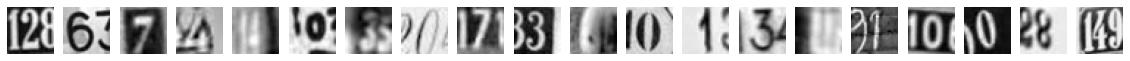

label for each of the above image: [2 6 7 4 4 0 3 0 7 3 1 0 1 3 1 1 0 0 8 4]


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

for i in range(20):
  plt.subplot(1,20,i+1)
  plt.imshow(X_train[i],cmap ="gray")
  plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:20]))

In [0]:
#Keras expects data to be in the format (N_E.N_H,N_W,N_C)
#N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.
X_train = X_train.reshape(42000,32,32,1)
X_test = X_test.reshape(18000,32,32,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
print(y_train[0])

2


In [9]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
print(y_train[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32,32,1)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64 , activation='relu'))

model.add(Dense(10, activation='softmax'))

In [0]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

optimizer = Adam(learning_rate=0.001)

model.compile(loss=categorical_crossentropy,
              optimizer = optimizer,
              metrics = ['accuracy'])

In [23]:
!pip install -U tensorboardcolab
!pip install -U tensorflow

Requirement already up-to-date: tensorboardcolab in /usr/local/lib/python3.6/dist-packages (0.0.22)
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0)


In [20]:
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
tbc = TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
http://1924a6c43a15.ngrok.io


In [0]:
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0.001,patience=10)

modelcheckpoint = ModelCheckpoint('SVHH_NN_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                  monitor = 'val_loss',
                                  verbose = 1,
                                  save_best_only=True,
                                  save_weights_only=True,
                                  mode='auto',
                                  period=1
                                  )

In [25]:
model.fit(X_train,y_train,
          batch_size=128,
          epochs=12,
          validation_data=(X_test,y_test),
          callbacks=[early_stopping,modelcheckpoint]
          )

Train on 42000 samples, validate on 18000 samples
Epoch 1/12
42000/42000 [==============================] - 140s 3ms/step - loss: 0.5154 - accuracy: 0.8490 - val_loss: 0.5069 - val_accuracy: 0.8566

Epoch 00001: val_loss improved from inf to 0.50695, saving model to SVHH_NN_cnn_checkpoint_01_loss0.5069.h5
Epoch 2/12
42000/42000 [==============================] - 144s 3ms/step - loss: 0.4494 - accuracy: 0.8680 - val_loss: 0.4449 - val_accuracy: 0.8757

Epoch 00002: val_loss improved from 0.50695 to 0.44488, saving model to SVHH_NN_cnn_checkpoint_02_loss0.4449.h5
Epoch 3/12
42000/42000 [==============================] - 140s 3ms/step - loss: 0.3976 - accuracy: 0.8812 - val_loss: 0.4224 - val_accuracy: 0.8810

Epoch 00003: val_loss improved from 0.44488 to 0.42238, saving model to SVHH_NN_cnn_checkpoint_03_loss0.4224.h5
Epoch 4/12
42000/42000 [==============================] - 140s 3ms/step - loss: 0.3536 - accuracy: 0.8922 - val_loss: 0.3980 - val_accuracy: 0.8860

Epoch 00004: val_loss 